In [35]:
# Tensorflow logistic regression
import numpy as np
import tensorflow as tf

tf.set_random_seed(0)  # 乱数シード

# weight, bias
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# model y = sigmmoid(w^T*x + b)
# input x
x = tf.placeholder(tf.float32, shape=[None, 2])
# teacher
t = tf.placeholder(tf.float32, shape=[None, 1])
# output y
y = tf.nn.sigmoid(tf.matmul(x, w) + b) 

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
# 確認
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

# OR logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(200):
    sess.run(train_step, feed_dict={
            x: X,
            t: Y
        })

classified = correct_prediction.eval(session=sess, feed_dict={
        x: X,
        t: Y
    })
print(classified)

prob = y.eval(session=sess, feed_dict={
        x: X,
        t: Y
    })

print(prob)

# 学習したパラメータの確認
print('w:', sess.run(w))
print('b:', sess.run(b))

[[ True]
 [ True]
 [ True]
 [ True]]
[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
w: [[ 3.61188436]
 [ 3.61188436]]
b: [-1.24509501]


In [36]:
# Keras logistic regression
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[1]])
model.fit(X,Y,epochs=200,batch_size=1)
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('classified')
print(Y == classes)
print()

print('output probability:')
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.9976     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8754     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.7831     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7140     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.6599     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.6187     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.5869     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.5613     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.5399     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.5227     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.5084     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.4954     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.4839     
Epoch 14/200
4/4 [================

In [37]:
# Tensorflow Multi Logistic Regression
from sklearn.utils import shuffle

M = 2 # dimension of input
K = 3 # number of class
n = 100 # number of data per class
N = n * K # all data

# sample data
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1,0,0] for _ in range(n)])
Y2 = np.array([[0,1,0] for _ in range(n)])
Y3 = np.array([[0,0,1] for _ in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

tf.set_random_seed(0)  # 乱数シード

# weight, bias
w = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

# model y = sigmmoid(w^T*x + b)
# input x
x = tf.placeholder(tf.float32, shape=[None, M])
# teacher
t = tf.placeholder(tf.float32, shape=[None, K])
# output y
y = tf.nn.softmax(tf.matmul(x, w) + b) 

cross_entropy = tf.reduce_mean(- tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
# 確認
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t,1))

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50
n_batches = N

for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
                x: X_[start:end],
                t: Y_[start:end]
            })
X_,Y_ = shuffle(X,Y)
classified = correct_prediction.eval(session=sess, feed_dict={
        x: X_[0:10],
        t: Y_[0:10]
    })
prob = y.eval(session=sess, feed_dict={
        x: X_[0:10]
    })

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  2.51478720e-02   9.72906291e-01   1.94587547e-03]
 [  1.48497477e-01   8.44408453e-01   7.09398324e-03]
 [  9.87741709e-01   1.22583313e-02   2.51842600e-08]
 [  9.71690059e-01   2.83099897e-02   6.18570262e-09]
 [  9.90506709e-01   9.49331466e-03   3.73369824e-09]
 [  9.57944930e-01   4.20549363e-02   6.18812166e-08]
 [  2.07735859e-02   9.76254106e-01   2.97234813e-03]
 [  9.95067120e-01   4.93289670e-03   4.34059633e-09]
 [  2.32827384e-02   9.73150969e-01   3.56635731e-03]
 [  9.05207917e-03   9.84450161e-01   6.49771141e-03]]


In [38]:
# keras
model = Sequential()
model.add(Dense(input_dim=M, units = K))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

minibatch_size = 50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=1)

print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('output probability:')
print(prob)

Epoch 1/20
300/300 [==============================] - 0s - loss: 0.5266     
Epoch 2/20
300/300 [==============================] - 0s - loss: 0.0755     
Epoch 3/20
300/300 [==============================] - 0s - loss: 0.0506     
Epoch 4/20
300/300 [==============================] - 0s - loss: 0.0421     
Epoch 5/20
300/300 [==============================] - 0s - loss: 0.0382     
Epoch 6/20
300/300 [==============================] - 0s - loss: 0.0363     
Epoch 7/20
300/300 [==============================] - 0s - loss: 0.0335     
Epoch 8/20
300/300 [==============================] - 0s - loss: 0.0319     
Epoch 9/20
300/300 [==============================] - 0s - loss: 0.0305     
Epoch 10/20
300/300 [==============================] - 0s - loss: 0.0291     
Epoch 11/20
300/300 [==============================] - 0s - loss: 0.0283     
Epoch 12/20
300/300 [==============================] - 0s - loss: 0.0272     
Epoch 13/20
300/300 [==============================] - 0s - loss: 0.0261 

C:\Users\maeda\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


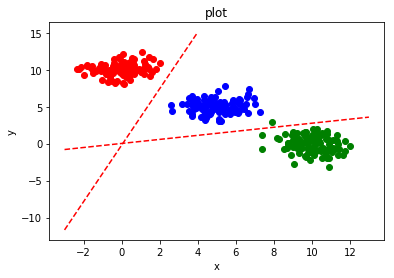

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(X1[:,0], X1[:,1], c='red')
ax.scatter(X2[:,0], X2[:,1], c='blue')
ax.scatter(X3[:,0], X3[:,1], c='green')


w11 = sess.run(w)[0][0]
w12 = sess.run(w)[0][1]
b1 = sess.run(b)[0]
linex = np.arange(-3, 5)
liney = - linex * w11 / w12 - b1 * w11 / w12
ax.plot(linex, liney, label='zero/one', color='red', linestyle='--')
linex = np.arange(-3, 5)

w21 = sess.run(w)[1][1]
w22 = sess.run(w)[1][2]
b2 = sess.run(b)[1]
linex = np.arange(-3, 14)
liney = - linex * w21 / w22 - b2 * w21 / w22
ax.plot(linex, liney, label='one/two', color='red', linestyle='--')

ax.set_title('plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()